In [31]:
import numpy as np
import matplotlib.pyplot as plt
import os
import torch

In [ ]:
save_dir = "/Users/saad.lahrichi/PhD/Nautilus/spie/develop/results/meep_meep/inverse/"
train_field_resim = torch.load(os.path.join(save_dir, "train_field_resim.pt"), weights_only=False)
train_field_truth = torch.load(os.path.join(save_dir, "train_field_truth.pt"), weights_only=False)


def compute_error(resim, truth, metric="mse"):
    """Computes error between predicted (resim) and ground truth (truth)."""
    if metric == "mse":
        return np.mean((resim - truth) ** 2)   
errors = [compute_error(resim, truth) for resim, truth in zip(train_field_resim, train_field_truth)]
errors_np = np.array(errors)

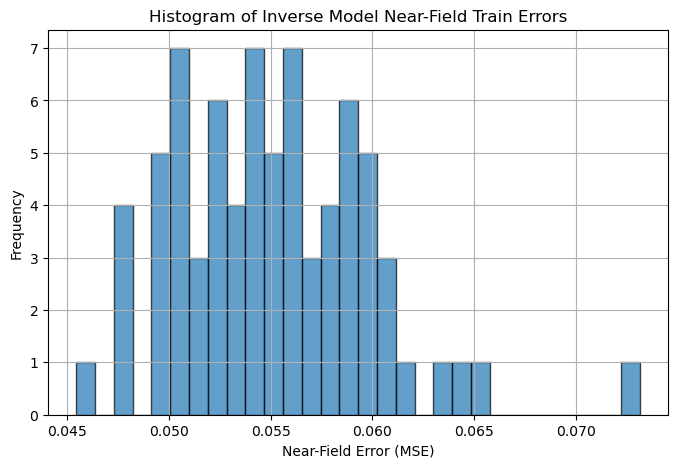

In [33]:
plt.figure(figsize=(8, 5))
plt.hist(errors_np, bins=30, alpha=0.7, edgecolor="black")
plt.xlabel("Near-Field Error (MSE)")
plt.ylabel("Frequency")
plt.title("Histogram of Inverse Model Near-Field Train Errors")
plt.grid(True)
plt.show()


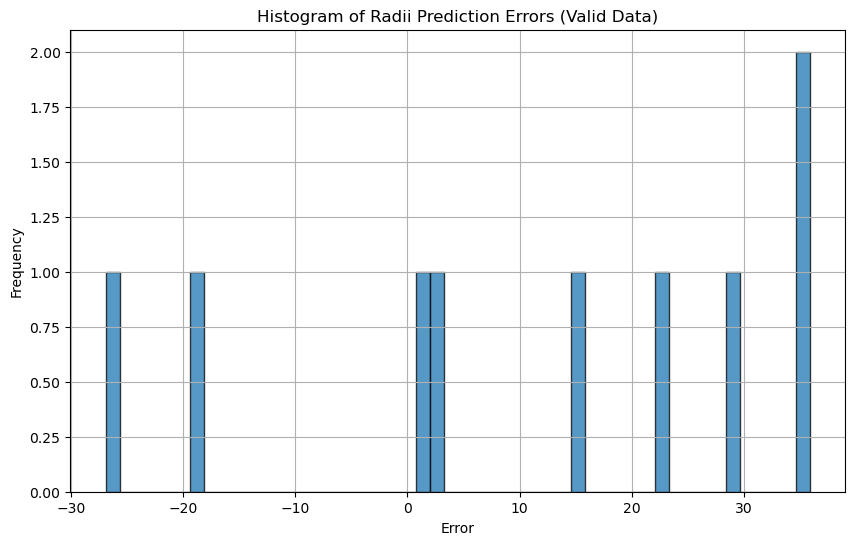

In [11]:
plt.figure(figsize=(10, 6))
plt.hist(errors, bins=50, alpha=0.75, edgecolor='black')
plt.title("Histogram of Radii Prediction Errors (Valid Data)")
plt.xlabel("Error")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


In [19]:
results_dir = "/Users/saad.lahrichi/PhD/Nautilus/spie/develop/results/meep_meep"
field_pred = np.load(os.path.join(results_dir, "valid_field_resim.npy"))
field_truth = np.load(os.path.join(results_dir,"valid_field_truth.npy"))

squared_diff = (field_pred - field_truth) ** 2
mse_per_sample = np.mean(squared_diff, axis=(1, 2, 3, 4))

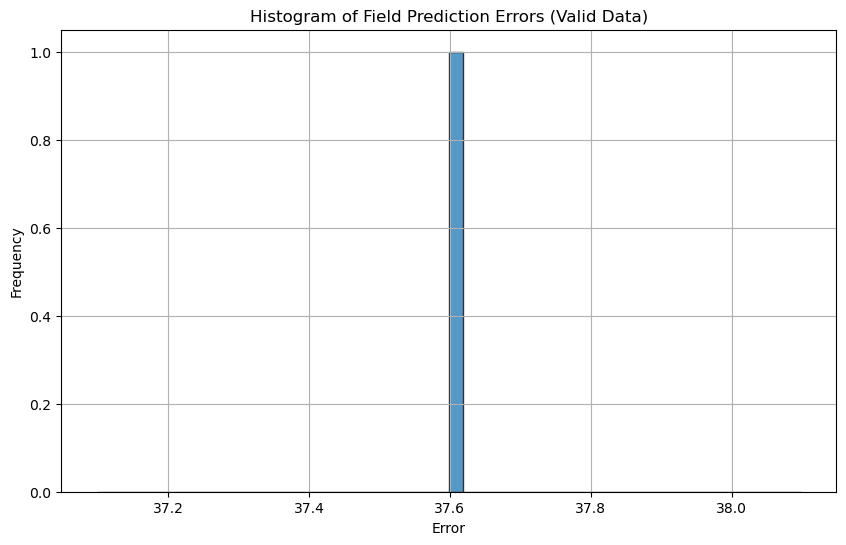

In [21]:
plt.figure(figsize=(10, 6))
plt.hist(mse_per_sample, bins=50, alpha=0.75, edgecolor='black')
plt.title("Histogram of Field Prediction Errors (Valid Data)")
plt.xlabel("Error")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()




In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os

# Define directories (adjust paths as needed)
forward_dir = "results/forward"
inverse_dir = "results/inverse"
tandem_dir  = "results/tandem"

# Load errors for the Forward model
forward_train_errors = np.loadtxt(os.path.join(forward_dir, "train_errors.txt"))
forward_valid_errors = np.loadtxt(os.path.join(forward_dir, "valid_errors.txt"))

# Load errors for the Inverse model
inverse_train_errors = np.loadtxt(os.path.join(inverse_dir, "train_errors.txt"))
inverse_valid_errors = np.loadtxt(os.path.join(inverse_dir, "valid_errors.txt"))

# Load errors for the Tandem model
tandem_train_errors = np.loadtxt(os.path.join(tandem_dir, "train_errors.txt"))
tandem_valid_errors = np.loadtxt(os.path.join(tandem_dir, "valid_errors.txt"))

# -------------------------------
# 1. Plot Forward Model Errors
# -------------------------------
fig_forward, axs_forward = plt.subplots(2, 1, figsize=(10, 8))
axs_forward[0].hist(forward_train_errors, bins=50, alpha=0.75, edgecolor='black')
axs_forward[0].set_title("Forward Model - Train Errors")
axs_forward[0].set_xlabel("Error")
axs_forward[0].set_ylabel("Frequency")
axs_forward[0].grid(True)

axs_forward[1].hist(forward_valid_errors, bins=50, alpha=0.75, edgecolor='black')
axs_forward[1].set_title("Forward Model - Validation Errors")
axs_forward[1].set_xlabel("Error")
axs_forward[1].set_ylabel("Frequency")
axs_forward[1].grid(True)

plt.tight_layout()
plt.show()

# ---------------------------------------------------------
# 2. Plot Inverse and Tandem Model Errors with Shared x-axis
# ---------------------------------------------------------
# Compute global x-axis limits from both Inverse and Tandem errors
combined_errors = np.concatenate([
    inverse_train_errors, inverse_valid_errors,
    tandem_train_errors, tandem_valid_errors
])
global_xmin, global_xmax = np.min(combined_errors), np.max(combined_errors)

# Create a 2x2 grid: left column for Inverse, right column for Tandem.
fig_combined, axs = plt.subplots(2, 2, figsize=(12, 10), sharex=True)

# --- Inverse Model ---
axs[0, 0].hist(inverse_train_errors, bins=50, alpha=0.75, edgecolor='black')
axs[0, 0].set_title("Inverse Model - Train Errors")
axs[0, 0].grid(True)

axs[1, 0].hist(inverse_valid_errors, bins=50, alpha=0.75, edgecolor='black')
axs[1, 0].set_title("Inverse Model - Validation Errors")
axs[1, 0].set_xlabel("Error")
axs[1, 0].set_ylabel("Frequency")
axs[1, 0].grid(True)

# --- Tandem Model ---
axs[0, 1].hist(tandem_train_errors, bins=50, alpha=0.75, edgecolor='black')
axs[0, 1].set_title("Tandem Model - Train Errors")
axs[0, 1].grid(True)

axs[1, 1].hist(tandem_valid_errors, bins=50, alpha=0.75, edgecolor='black')
axs[1, 1].set_title("Tandem Model - Validation Errors")
axs[1, 1].set_xlabel("Error")
axs[1, 1].grid(True)

# Set the same x-axis limits for all inverse/tandem subplots
for ax in axs.flatten():
    ax.set_xlim(global_xmin, global_xmax)

plt.tight_layout()
plt.show()
